In [1]:
from utils import *
from fastai2.vision.widgets import *

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
key = "a1a6fc04cf354d6bbb6841336b3a0796"


In [ ]:
??search_images_bing

In [ ]:
result = search_images_bing(key, "mercedez car")


In [ ]:
result1 = result.attrgot('content_url')

In [ ]:
len(result1)

In [ ]:
result1[0]

In [ ]:
dest = "images/car.jpg"
download_url(result1[0], dest)

In [ ]:
im = Image.open(dest)

In [ ]:
im.to_thumb(128, 128)

# Car Types

In [4]:
cars = "mercedes", "volkswagen", "Audi", "BMW", "Porsche", "Tesla", "Ford", "Opel", "Skoda", "Renault", "Toyota", "Peugeot", "Mazda", "Citroen", "Hyundai", "Minicooper"

In [6]:
path = Path("images/Cars")

In [6]:
if not path.exists():
    path.mkdir()
    for o in cars:
        print(o)
        dest = (path/o)
        dest.mkdir(exist_ok = True)
        results = search_images_bing(key, f'{o} cars')
        download_images(dest, urls=results.attrgot("content_url"))

mercedes


volkswagen


Audi


BMW


Porsche


Tesla


Ford


Opel


Skoda


Renault


Toyota



 Download of https://classicsworld.co.uk/wp-content/uploads/2018/02/Toyota-2000GT.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p images/Cars/Toyota
$ cd images/Cars/Toyota
$ wget -c https://classicsworld.co.uk/wp-content/uploads/2018/02/Toyota-2000GT.jpg
$ tar xf Toyota-2000GT.jpg
 And re-run your code once the download is successful

Peugeot


Mazda


Citroen


Hyundai


Minicooper


In [ ]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('content_url'))

In [7]:
fns = get_image_files(path)
fns

(#2310) [Path('images/Cars/Peugeot/00000104.jpg'),Path('images/Cars/Peugeot/00000143.jpg'),Path('images/Cars/Peugeot/00000111.jpg'),Path('images/Cars/Peugeot/00000065.jpg'),Path('images/Cars/Peugeot/00000101.jpg'),Path('images/Cars/Peugeot/00000035.jpg'),Path('images/Cars/Peugeot/00000147.jpg'),Path('images/Cars/Peugeot/00000118.jpg'),Path('images/Cars/Peugeot/00000039.jpg'),Path('images/Cars/Peugeot/00000059.jpg')...]

In [8]:
failed = verify_images(fns)
failed

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:2860: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:2860: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:2860: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:2860: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:2860: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/opt/conda/lib/python3.7/site-packages/PIL/Image.py:2860: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)
/opt

(#238) [Path('images/Cars/Peugeot/00000096.jpg'),Path('images/Cars/Peugeot/00000146.jpg'),Path('images/Cars/Peugeot/00000132.jpg'),Path('images/Cars/Peugeot/00000063.jpg'),Path('images/Cars/Peugeot/00000117.jpg'),Path('images/Cars/Peugeot/00000095.jpg'),Path('images/Cars/Peugeot/00000113.jpg'),Path('images/Cars/Peugeot/00000057.jpg'),Path('images/Cars/Minicooper/00000064.jpg'),Path('images/Cars/Minicooper/00000065.png')...]

In [9]:
failed.map(Path.unlink);

In [13]:
doc(DataBlock)

In [7]:
cars = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 88),
    get_y = parent_label,
    item_tfms= Resize(128))

In [16]:
dls = cars.dataloaders(path)

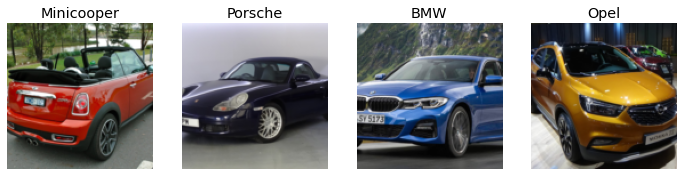

In [22]:
dls.valid.show_batch(max_n=4, nrows=1)

/opt/conda/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


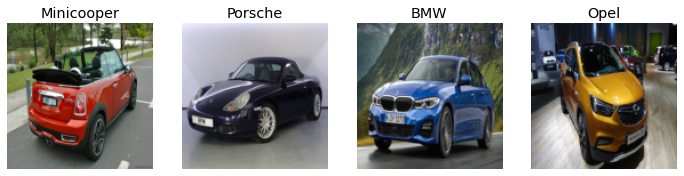

In [23]:
cars = cars.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = cars.dataloaders(path)
dls.valid.show_batch(max_n = 4, nrows = 1)




/opt/conda/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


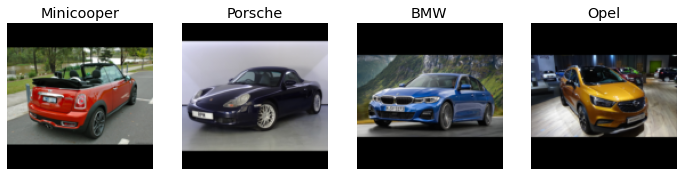

In [25]:
cars = cars.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode = "zeros"))
dls = cars.dataloaders(path)
dls.valid.show_batch(max_n = 4, nrows = 1)

# Training the model

In [17]:
cars = cars.new(item_tfms=RandomResizedCrop(224, min_scale = 0.5),
               batch_tfms= aug_transforms())
dls = cars.dataloaders(path)

In [18]:
len(dls.items)

1658

In [19]:
learn = cnn_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(30)

epoch,train_loss,valid_loss,error_rate,time
0,3.487145,2.262985,0.647343,00:23


epoch,train_loss,valid_loss,error_rate,time
0,2.245832,1.968164,0.565217,00:24
1,1.968760,1.842540,0.526570,00:25
2,1.734095,1.814523,0.500000,00:24
3,1.496456,1.727932,0.458937,00:24
4,1.270721,1.597078,0.446860,00:25
5,1.077547,1.519007,0.415459,00:24
6,0.884148,1.606432,0.429952,00:24
7,0.726791,1.657292,0.381643,00:24
8,0.626706,1.531142,0.379227,00:24
9,0.503692,1.579622,0.357488,00:24


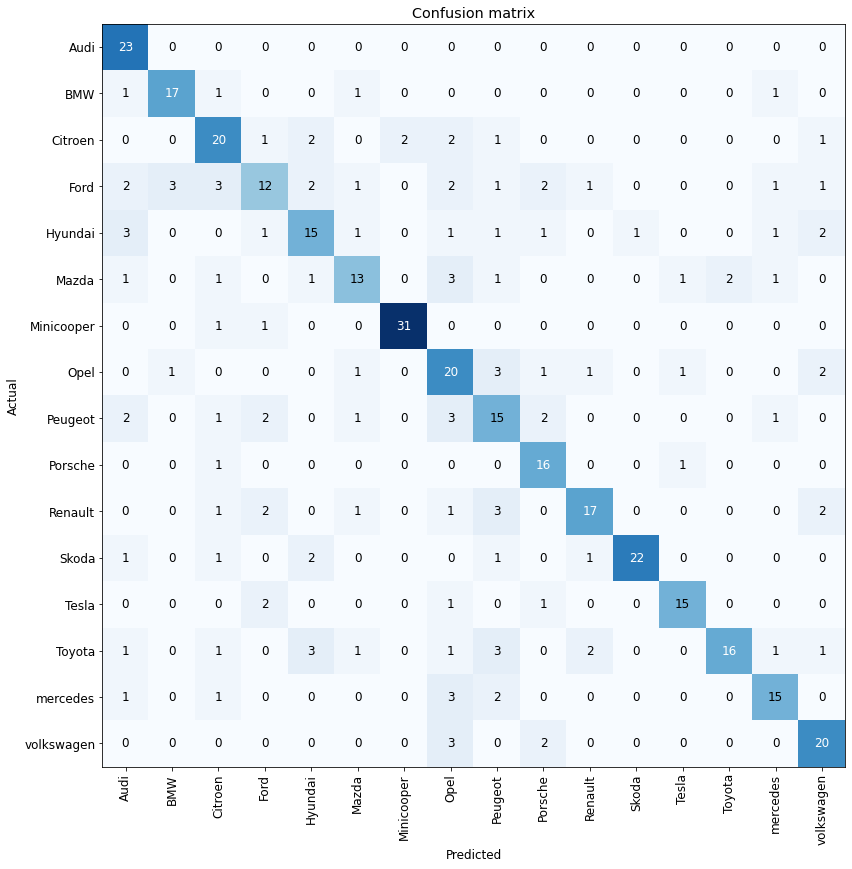

In [20]:
plt.rcParams["figure.figsize"] = 20, 12
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

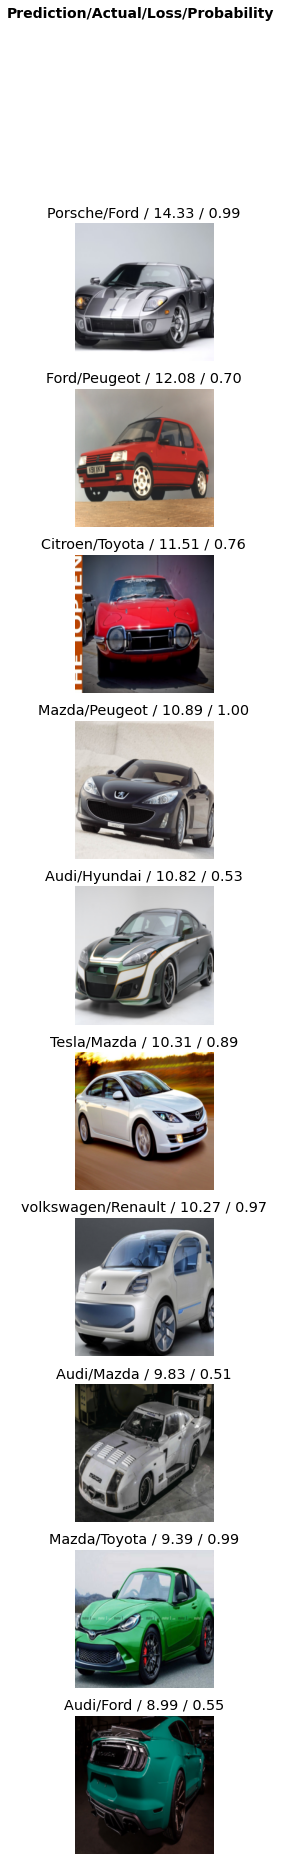

In [27]:
plt.rcParams["figure.figsize"] = 12, 6
interp.plot_top_losses(10, nrows = 10)

In [32]:
interp.most_confused()[:5]

[('Ford', 'BMW', 3),
 ('Ford', 'Citroen', 3),
 ('Hyundai', 'Audi', 3),
 ('Mazda', 'Opel', 3),
 ('Opel', 'Peugeot', 3)]

# learn the model for inference

In [33]:
learn.export()

In [34]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [35]:
learn_inf = load_learner(path/'export.pkl')

In [42]:
learn_inf.predict('images/mustang.jpg')

('Ford',
 tensor(3),
 tensor([3.5430e-06, 1.3840e-04, 1.4721e-06, 9.9909e-01, 2.2042e-06, 3.4612e-05, 1.8417e-06, 5.6932e-05, 1.2893e-05, 1.9558e-07, 5.2622e-08, 1.1094e-07, 5.7915e-04, 6.3071e-05, 1.2956e-05, 4.5328e-07]))

In [39]:
learn_inf.dls.vocab

(#16) ['Audi','BMW','Citroen','Ford','Hyundai','Mazda','Minicooper','Opel','Peugeot','Porsche'...]

In [41]:
??learn_inf.predict